In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

data_size = 20000
ones_frame = pd.DataFrame(np.ones((20000, 1)))
df_data_x = pd.read_csv("nuclear_x.csv", header=None)
df_data_x.columns = [1, 2]
df_data_x = pd.concat([ones_frame, df_data_x], axis=1)
df_data_y = pd.read_csv("nuclear_y.csv", header=None)
df_data_y.columns = [3]
df_data = pd.concat([df_data_x, df_data_y], axis=1)
steps = 40
theta = np.random.normal(0, 1, 3)
lam = 0.001
df_data = df_data.head(data_size)

data_rgb = df_data.apply(lambda row: 'red' if row[3] == -1 else 'green', axis=1).values


def calculate_loss():
    j = df_data.apply(lambda rv: np.max([0, 1 - rv[3] * np.dot(theta, rv[:-1])]), axis=1).sum()
    return j / data_size + lam / 2 * np.dot(theta[1:], theta[1:])


def get_subgradient():
    theta_wo_bias = np.copy(theta)
    theta_wo_bias[0] = 0
    subg = df_data.shape[0] * lam * theta_wo_bias
    subg = subg + df_data.apply(lambda row: - row[3] * row[:-1] if
                1 - row[3] * np.dot(theta, row[:-1]) > 0 else 0 * row[:-1], axis=1).sum()
    return subg/data_size


loss_steps = []
for varI in np.arange(1, steps, 1):
    theta = theta - 100 / varI * get_subgradient()
    if varI % 1 == 0:
        loss_steps.append(calculate_loss())

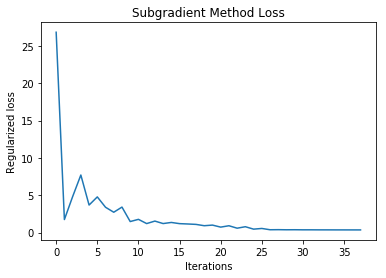

In [15]:
plt.ylabel("Regularized loss")
plt.xlabel("Iterations")
plt.title("Subgradient Method Loss")
plt.plot(loss_steps[1:])
plt.show()

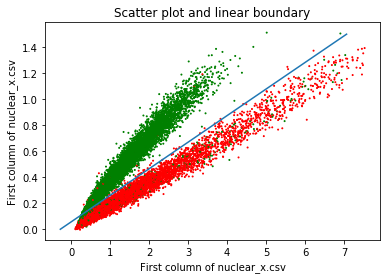

In [16]:
plt.title("Scatter plot and linear boundary")
plt.xlabel("First column of nuclear_x.csv")
plt.ylabel("First column of nuclear_x.csv")

plt.scatter(df_data[1], df_data[2], color=data_rgb, s=1)
plt.plot([-theta[0]/theta[1], -1.5 * theta[2]/theta[1] - theta[0]/theta[1]], [0, 1.5])
plt.show()

In [17]:
print(theta)

0    -1.068695
1    -3.839984
2    18.807983
dtype: float64


In [18]:
print(np.min(loss_steps[1:]))

0.3554486713209735
